<a href="https://colab.research.google.com/github/JulieOnIsland/Machine_Learning/blob/main/Movie_Review_Word2Vec_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한국어 Word2Vec 만들기

* 네이버 영화 리뷰 데이터로 한국어 Word2Vec을 만들어보자.
* 순서
    1. 데이터 전처리
    2. Word2Vec으로 임베딩
    3. 임베딩 벡터의 시각화

* 참고: https://wikidocs.net/50739 

## 데이터 전처리

In [3]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 1.6 MB/s 
     |████████████████████████████████| 448 kB 49.3 MB/s 


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [5]:
# 네이버 영화 리뷰 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7fd253e84550>)

In [6]:
train_data = pd.read_table('ratings.txt')
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [7]:
# 총 리뷰 개수
len(train_data)

200000

In [8]:
# 결측값 확인
train_data.isnull().sum()

id          0
document    8
label       0
dtype: int64

In [9]:
# 결측값 제거
train_data = train_data.dropna(how = 'any')
train_data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [10]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [11]:
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [12]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [13]:
from tqdm import tqdm

In [14]:
# 형태소 분석기 Okt를 사용해서 토큰화
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]        # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [12:42<00:00, 262.43it/s]


리뷰 최대 길이: 72
리뷰 평균 길이: 10.716703668146726


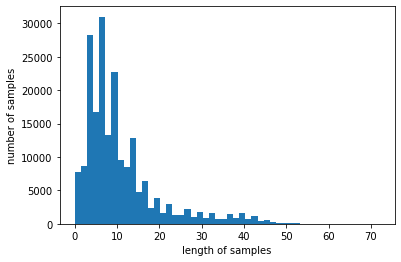

In [15]:
# 리뷰 길이 분포 확인
print(f'리뷰 최대 길이: {max(len(review) for review in tokenized_data)}')
print(f'리뷰 평균 길이: {sum(map(len, tokenized_data)) / len(tokenized_data)}')
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## Word2Vec으로 임베딩

In [16]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data,
                 size=100,
                 window=5,
                 min_count=5,
                 workers=4,
                 sg=0)

**Word2Vec의 하이퍼파라미터**
```
* size = 임베딩된 벡터의 차원
* window = 윈도우 크기
* min_count = 단어 최소 빈도수 제한 (빈도가 적은 단어들은 학습하지 않는다)
* workers = 학습을 위한 프로세스 수
* sg = 0은 CBOW, 1은 Skip-gram
```

In [17]:
# 임베딩 행렬의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [21]:
# '사랑'과 유사한 단어들을 뽑아보자
model.wv.most_similar("삶")

[('행복', 0.859858512878418),
 ('희망', 0.8470540046691895),
 ('자신', 0.8341476917266846),
 ('죽음', 0.8334308862686157),
 ('꿈', 0.8283249139785767),
 ('겪다', 0.8277158141136169),
 ('아픔', 0.8145536184310913),
 ('일상', 0.8082417249679565),
 ('삶다', 0.8040555715560913),
 ('살아가다', 0.8032398819923401)]

## 임베딩 벡터의 시각화

Google Embedding Projector를 활용해서 임베딩을 시각화해보자

참고: https://www.tensorflow.org/text/guide/word_embeddings

In [23]:
# 모델 저장
model.wv.save_word2vec_format('mv_w2v')

In [26]:
# 모델 로드 -> 확인
from gensim.models import KeyedVectors
loaded_model = KeyedVectors.load_word2vec_format("mv_w2v")
model_result = loaded_model.most_similar("삶")
model_result

[('행복', 0.859858512878418),
 ('희망', 0.8470540046691895),
 ('자신', 0.8341476917266846),
 ('죽음', 0.8334308862686157),
 ('꿈', 0.8283249139785767),
 ('겪다', 0.8277158141136169),
 ('아픔', 0.8145536184310913),
 ('일상', 0.8082417249679565),
 ('삶다', 0.8040555715560913),
 ('살아가다', 0.8032398819923401)]

In [27]:
!python -m gensim.scripts.word2vec2tensor --input mv_w2v --output mv_w2v

2022-02-15 06:56:15,014 - word2vec2tensor - INFO - running /usr/local/lib/python3.7/dist-packages/gensim/scripts/word2vec2tensor.py --input mv_w2v --output mv_w2v
2022-02-15 06:56:15,014 - utils_any2vec - INFO - loading projection weights from mv_w2v
2022-02-15 06:56:16,846 - utils_any2vec - INFO - loaded (16477, 100) matrix from mv_w2v
2022-02-15 06:56:18,345 - word2vec2tensor - INFO - 2D tensor file saved to mv_w2v_tensor.tsv
2022-02-15 06:56:18,345 - word2vec2tensor - INFO - Tensor metadata file saved to mv_w2v_metadata.tsv
2022-02-15 06:56:18,347 - word2vec2tensor - INFO - finished running word2vec2tensor.py


In [28]:
# metadata.tsv 파일과 tensor.tsv 파일 다운로드
try:
  from google.colab import files
  files.download('/content/mv_w2v_metadata.tsv')
  files.download('/content/mv_w2v_tensor.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

https://projector.tensorflow.org/ 에서 Load 버튼 클릭 후 mv_w2v_metadata.tsv와 mv_w2v_tensor.tsv파일을 업로드하면 된다.

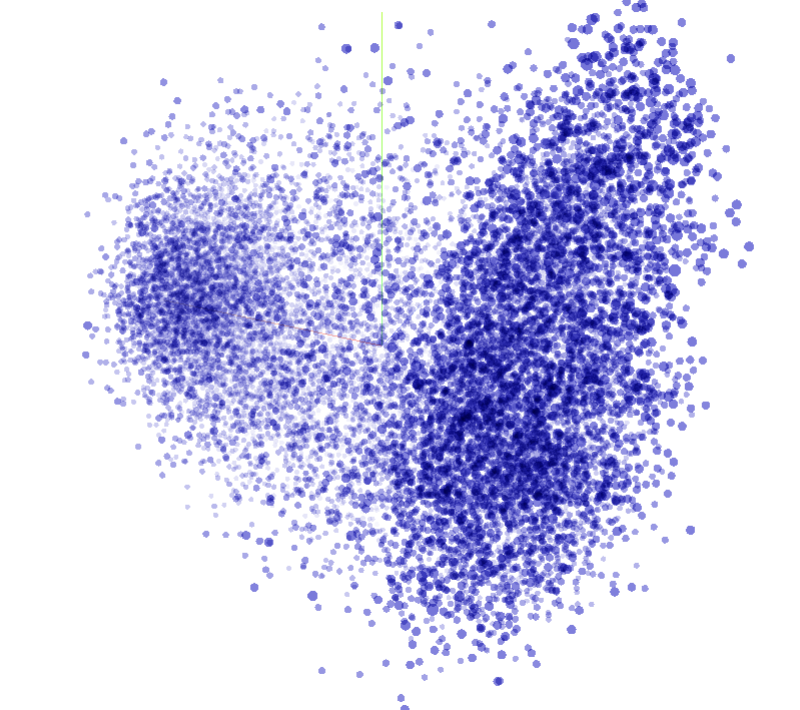

차원을 축소(100차원 -> 3차원)해서 우리 눈으로 볼 수 있다

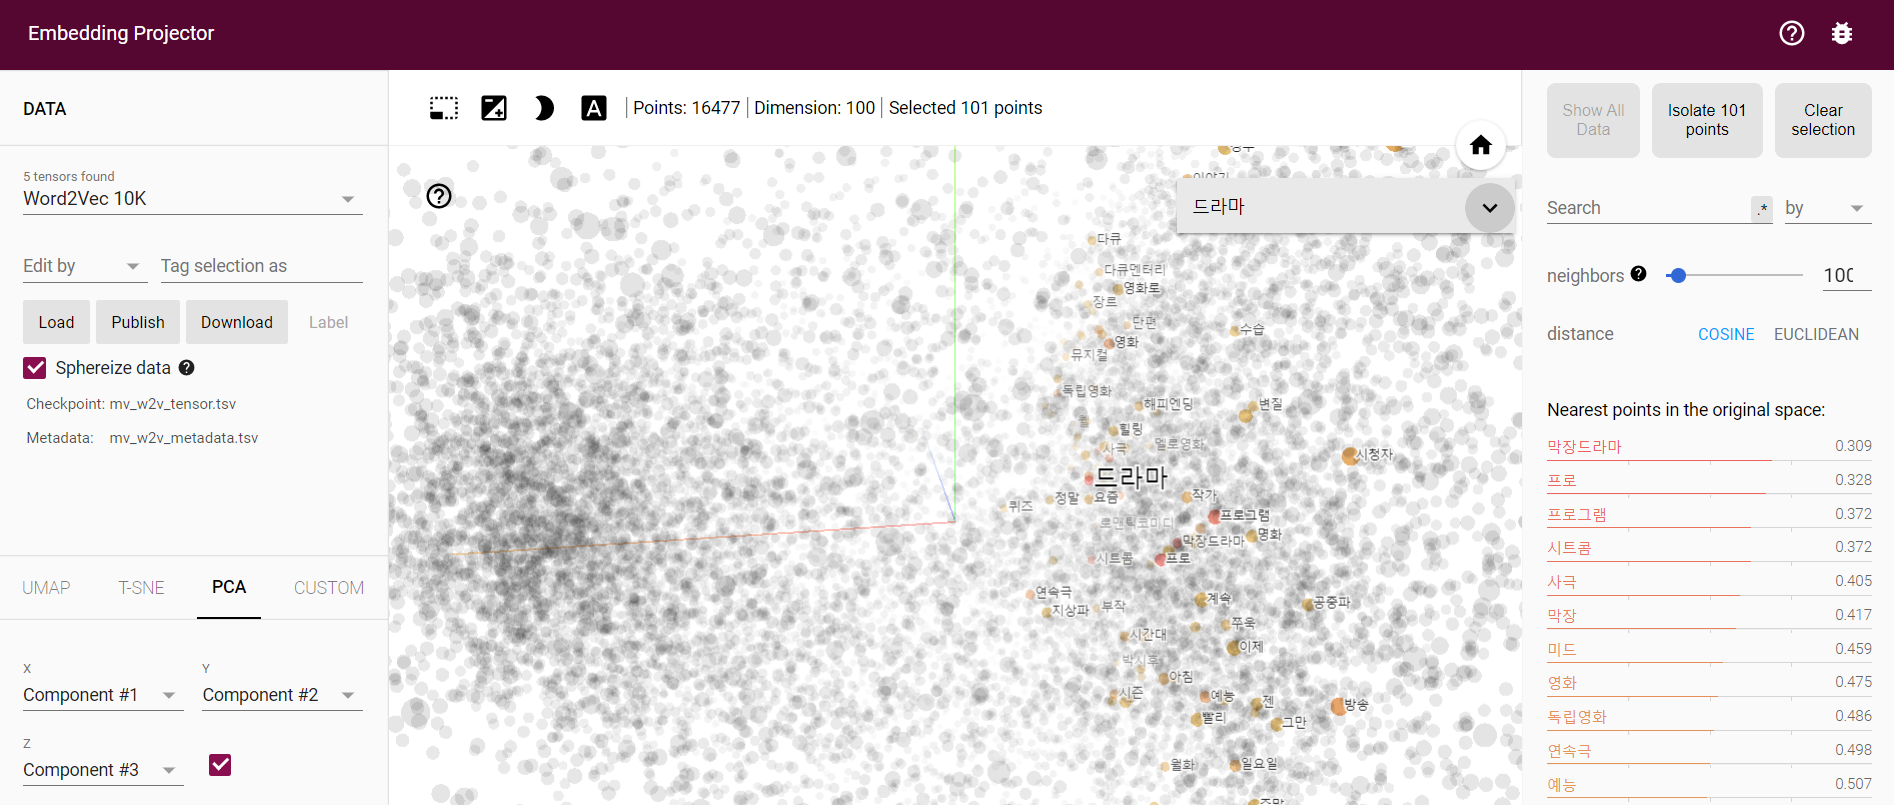